# K-Nearest Neighbors (K-NN)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
display(dataset)

# Define independent variables X and dependent variable y
# X = Age and EstimatedSalary, y = Purchased (0 = No, 1 = Yes)
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


## Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split

# Training Dataset: The sample of data used to fit the model.
# The actual dataset that we use to train the model (weights and biases in the case of Neural Network). 
# The model sees and learns from this data.

# Test Dataset: The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset.
# provides the gold standard used to evaluate the model.
# only used once a model is completely trained
# contains carefully sampled data that spans the various classes that the model would face, when used in the real world.

# Split dataset into training set (X_train, y_train) and test set (X_test, y_test), 
# test_size = proportion of the dataset to include in the test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

## Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler

# K-nearest neighbors requires features to be normalized as important to have values on same scale for acurate results
# Obviously age and estimated salary features  have different units, one in years, the other in $
# Standardization involves rescaling the features such that 
# -->they have the properties of a standard normal distribution with a mean of zero and a standard deviation of one
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## Fitting classifier to the training set

In [5]:
from sklearn.neighbors import KNeighborsClassifier

# Create and fit a nearest-neighbor classifier

# Neighbors-based classification is a type of instance-based learning or non-generalizing learning
# does not attempt to construct a general internal model, but simply stores instances of the training data
# Classification is computed from a simple majority vote of the nearest neighbors of each point: 
# a query point is assigned the data class which has the most representatives within the nearest neighbors of the point


# KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', 
# leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)
# n_neighbors=Number of neighbors, p=Power parameter for the Minkowski metric, metric=distance metric to use for the tree


classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Predicting the test set results

In [6]:
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Compute confusion matrix to evaluate the accuracy of a classification.

cm = confusion_matrix(y_test, y_pred)

print(cm)

#accuracy = ((cm[0,0]+cm[1,1])/(cm[0,0]+cm[1,1]+cm[1,0]+cm[1,0]))* 100

accuracy = accuracy_score(y_test, y_pred) *100

# \n = begin new paragraph

print('\nThe Model is {0}% accurate'.format(round(accuracy, 2)))

[[61  6]
 [ 4 29]]

The Model is 90.0% accurate


## Visualising the Training Set Results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


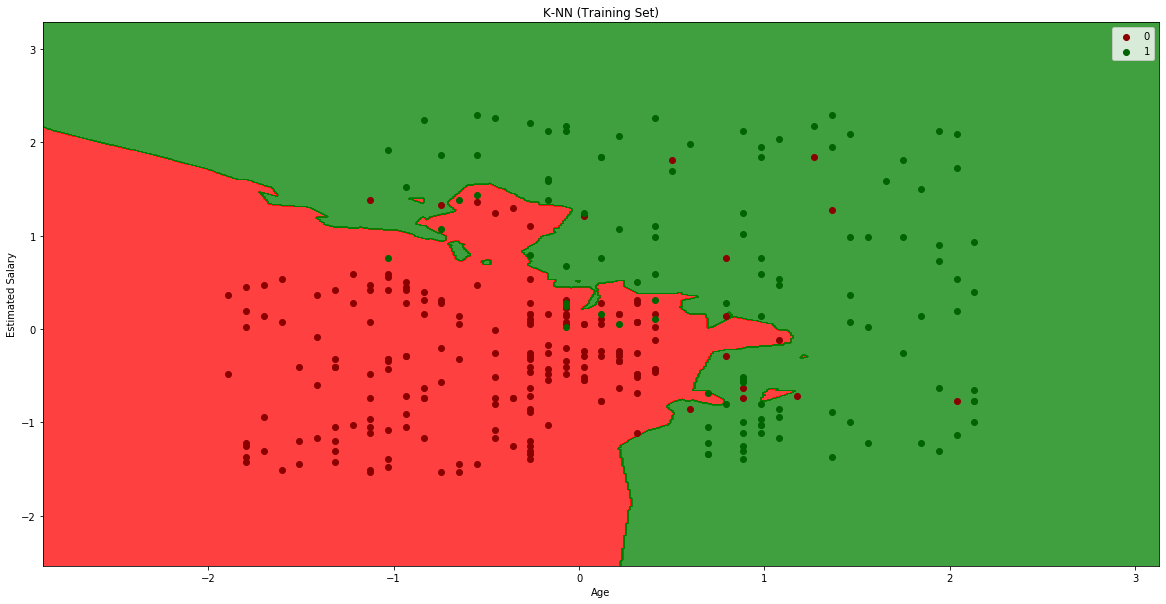

In [8]:
from matplotlib.colors import ListedColormap

# 2D plot, x = age, y = estimated salary, each point corresponding to customer
# will show prediction reason + curve separating 2 regions
# Green points purchased, red points didn't
# in green area, predicted to purchase, in red area, predicted not to purchase

X_set, y_set = X_train, y_train
# Grid creation contaning all x and y features, pixels separated every 0.01
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.figure(figsize=(20,10))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i , j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('darkred', 'darkgreen'))(i), label = j)
plt.title('K-NN (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test Set Results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


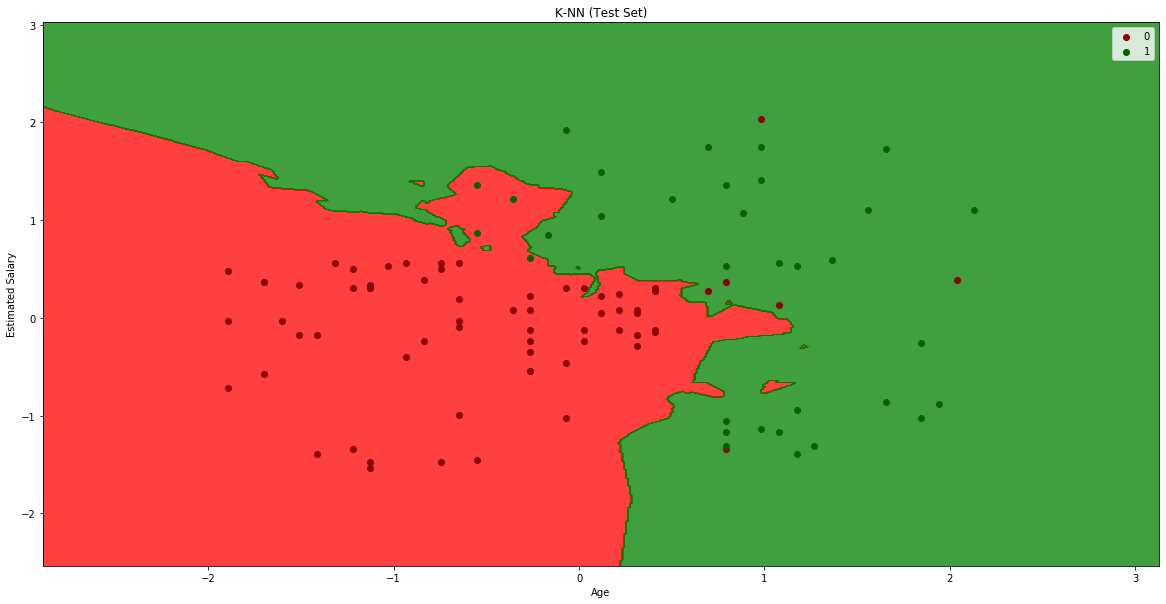

In [9]:
# 2D plot, x = age, y = estimated salary, each point corresponding to customer
# will show prediction reason + curve separating 2 regions
# Green points purchased, red points didn't
# in green area, predicted to purchase, in red area, predicted not to purchase

X_set, y_set = X_test, y_test
# Grid creation contaning all x and y features, pixels separated every 0.01
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.figure(figsize=(20,10))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i , j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('darkred', 'darkgreen'))(i), label = j)
plt.title('K-NN (Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems.

The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.

captures the idea of similarity (sometimes called distance, proximity, or closeness) with some mathematics we might have learned in our childhood— calculating the distance between points on a graph.

Load the data
<br>Initialize K to your chosen number of neighbors for each example in the data
<br>Calculate the distance between the query example and the current example from the data.
<br>Add the distance and the index of the example to an ordered collection
<br>Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances
<br>Pick the first K entries from the sorted collection
<br>Get the labels of the selected K entries
<br>If regression, return the mean of the K labels
<br>If classification, return the mode of the K labels